### KNN (K-nearest Neighbours) Algorithm

In [65]:
import pandas as pd

In [81]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

In [82]:
data = pd.read_csv(url)

In [83]:
data.head()


,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [84]:
data.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings"
]

In [85]:
data.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [86]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [87]:
import matplotlib.pyplot as plt

In [88]:
#correlation

data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [90]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [92]:
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [93]:
data['Sex'].replace(['F','M','I'],[0,1,5],inplace=True)

In [94]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


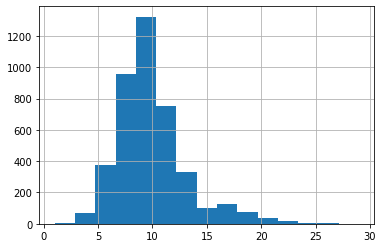

In [95]:
data["Rings"].hist(bins=15)
plt.show()

In [96]:
X = data.drop("Rings", axis=1)

In [97]:
X = X.values

In [98]:
X

array([[1.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       [1.    , 0.44  , 0.365 , ..., 0.2155, 0.114 , 0.155 ],
       ...,
       [1.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [1.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [99]:
y = data["Rings"]

In [100]:
y = y.values

In [101]:
y

array([ 7,  9, 10, ...,  9, 10, 12], dtype=int64)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [103]:
from sklearn.neighbors import KNeighborsRegressor

In [104]:
y_train

array([ 8, 19, 11, ...,  8, 15, 10], dtype=int64)

In [105]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [106]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions_train = knn_model.predict(X_train)
mse = mean_squared_error(y_train, predictions_train)
rmse = sqrt(mse)
rmse

1.6721765211934432

In [108]:
predictions_test = knn_model.predict(X_test)
mse = mean_squared_error(y_test, predictions_test)
rmse = sqrt(mse)
rmse

2.244669981983323

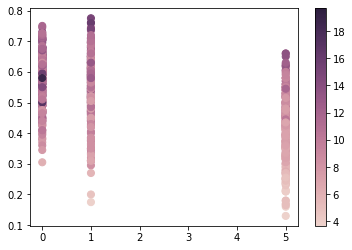

In [109]:
#Plotting the model fit

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()